In [98]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pandas.io.json import json_normalize

pd.options.display.max_columns = 1000
        
%matplotlib inline


In [99]:
with open('../data/recent-data/recent_01-05__00.json') as f:
    d = json.load(f)

In [100]:
data = json_normalize(d['summaries'])
data.head()

,architectures,categories,certification_status,created_at,filter_type,id,logo_url.large,logo_url.small,name,operating_systems,popularity,publisher.id,publisher.name,pull_count,short_description,slug,source,star_count,type,updated_at
0,"[{'name': 'amd64', 'label': 'x86-64'}]",None,not_certified,2018-06-07T11:37:55.871199Z,community,,,,opensuse/portus,"[{'name': 'linux', 'label': 'Linux'}]",0,535a7a6274c011e4bea40242ac11001b,opensuse,1M+,Authorization service and frontend for Docker ...,opensuse/portus,community,41,image,2019-04-30T23:59:19.344857Z
1,"[{'name': 'amd64', 'label': 'x86-64'}]",None,not_certified,2018-09-06T12:26:55.953085Z,community,,,,iterait/archlinux,"[{'name': 'linux', 'label': 'Linux'}]",0,81edd1534c5f41f5ac074762589a3a9e,iterait,3.0K,Customized ArchLinux image.,iterait/archlinux,community,0,image,2019-04-30T23:58:49.948974Z
2,"[{'name': '', 'label': ''}, {'name': 'amd64', ...",None,not_certified,2017-04-06T06:45:03.114546Z,community,,,,alpeware/chrome-headless-trunk,"[{'name': '', 'label': ''}, {'name': 'linux', ...",0,47952fc48a884d1a98dab43798de6373,alpeware,5M+,Always up-to-date Headless Chrome right off th...,alpeware/chrome-headless-trunk,community,25,image,2019-04-30T23:58:24.64895Z
3,[],None,not_certified,2019-04-30T23:58:20.033864Z,community,,,,windriver/sparts-test,[],0,688daead8b8c421299d25bf1838badda,windriver,0,,windriver/sparts-test,community,0,image,2019-04-30T23:58:20.033864Z
4,"[{'name': 'amd64', 'label': 'x86-64'}]",None,not_certified,2017-08-14T15:21:19.490759Z,community,,,,moneymanagerex/mmex_build_env,"[{'name': 'linux', 'label': 'Linux'}]",0,24834ca252cd45c48bdf4b80341d6bbf,moneymanagerex,50K+,Linux preconfigured build environment to compi...,moneymanagerex/mmex_build_env,community,1,image,2019-04-30T23:58:18.09384Z


In [101]:
data['architectures'] = data['architectures'].map(lambda x: [i['name'] for i in x if i['name'] is not ""] if len(x) else [])

In [102]:
data['architectures'] = data['architectures'].apply(sorted)

In [104]:
data['num_archs'] = data['architectures'].map(lambda x: len(x))

In [105]:
data['architectures'] = data['architectures'].map(lambda x: ", ".join(x))

In [106]:
data['num_archs'].value_counts()

1    796
0     84
6     53
2     24
3     19
5     14
4     10
Name: num_archs, dtype: int64

In [107]:
data['architectures'].value_counts()

amd64                                     787
                                           84
386, amd64, arm, arm64, ppc64le, s390x     53
amd64, arm64                               20
amd64, arm, arm64                          14
386, amd64, arm, arm64, ppc64le             8
arm                                         5
386, amd64, arm, arm64                      5
amd64, arm, arm64, ppc64le, s390x           4
386, amd64, ppc64le, s390x                  3
amd64, arm64, ppc64le                       2
386, amd64, arm64, ppc64le                  2
386, amd64                                  2
arm64                                       2
amd64, arm64, s390x                         1
386, amd64, arm64, ppc64le, s390x           1
amd64, arm                                  1
386, amd64, arm, ppc64le, s390x             1
amd64, ppc, s390x                           1
amd64, ppc                                  1
s390x                                       1
ppc64le                           

In [108]:
data.head()

,architectures,categories,certification_status,created_at,filter_type,id,logo_url.large,logo_url.small,name,operating_systems,popularity,publisher.id,publisher.name,pull_count,short_description,slug,source,star_count,type,updated_at,num_archs
0,amd64,None,not_certified,2018-06-07T11:37:55.871199Z,community,,,,opensuse/portus,"[{'name': 'linux', 'label': 'Linux'}]",0,535a7a6274c011e4bea40242ac11001b,opensuse,1M+,Authorization service and frontend for Docker ...,opensuse/portus,community,41,image,2019-04-30T23:59:19.344857Z,1
1,amd64,None,not_certified,2018-09-06T12:26:55.953085Z,community,,,,iterait/archlinux,"[{'name': 'linux', 'label': 'Linux'}]",0,81edd1534c5f41f5ac074762589a3a9e,iterait,3.0K,Customized ArchLinux image.,iterait/archlinux,community,0,image,2019-04-30T23:58:49.948974Z,1
2,amd64,None,not_certified,2017-04-06T06:45:03.114546Z,community,,,,alpeware/chrome-headless-trunk,"[{'name': '', 'label': ''}, {'name': 'linux', ...",0,47952fc48a884d1a98dab43798de6373,alpeware,5M+,Always up-to-date Headless Chrome right off th...,alpeware/chrome-headless-trunk,community,25,image,2019-04-30T23:58:24.64895Z,1
3,,None,not_certified,2019-04-30T23:58:20.033864Z,community,,,,windriver/sparts-test,[],0,688daead8b8c421299d25bf1838badda,windriver,0,,windriver/sparts-test,community,0,image,2019-04-30T23:58:20.033864Z,0
4,amd64,None,not_certified,2017-08-14T15:21:19.490759Z,community,,,,moneymanagerex/mmex_build_env,"[{'name': 'linux', 'label': 'Linux'}]",0,24834ca252cd45c48bdf4b80341d6bbf,moneymanagerex,50K+,Linux preconfigured build environment to compi...,moneymanagerex/mmex_build_env,community,1,image,2019-04-30T23:58:18.09384Z,1


In [109]:
data = data.drop(['certification_status', 'id', 'filter_type', 'logo_url.large', 'logo_url.small', 'popularity', 'publisher.id', 'name', 'publisher.name', 'type'], axis=1)

In [110]:
data['operating_systems'] = data['operating_systems'].map(lambda x: ", ".join(i['label'] for i in x if i['label'] is not "") if len(x) else None)

In [111]:
data['pull_count'] = data['pull_count'].map(lambda x: str(x)[:-1] if "+" in str(x) else str(x))

In [112]:
data['pull_count'].value_counts()

0       220
10M      94
10K      52
1M       41
50K      25
100K     25
5M       15
500K     14
1        12
4        11
1.9K     10
1.7K      9
1.1K      9
2.3K      8
2.4K      7
2.0K      7
2.7K      7
1.3K      6
3.5K      6
1.5K      6
48        6
2.8K      6
1.6K      6
1.2K      6
nan       5
3         5
1.8K      5
2.6K      5
2.2K      5
2.5K      4
       ... 
392       1
503       1
419       1
13        1
132       1
6.0K      1
71        1
646       1
109       1
82        1
155       1
906       1
173       1
626       1
536       1
431       1
262       1
118       1
148       1
24        1
105       1
4.4K      1
363       1
31        1
23        1
247       1
382       1
183       1
567       1
265       1
Name: pull_count, Length: 288, dtype: int64

In [113]:
data['pull_count'] = data['pull_count'].map(lambda x: float(x[:-1])*1000 if x[-1] is "K" else float(x[:-1])*1000000 if x[-1] is "M" else float(x))

In [114]:
data['categories_exists'] = data['categories'].map(lambda x: 1 if x else 0)

In [116]:
data['category_count'] = data['categories'].map(lambda x: len(x) if x else 0)

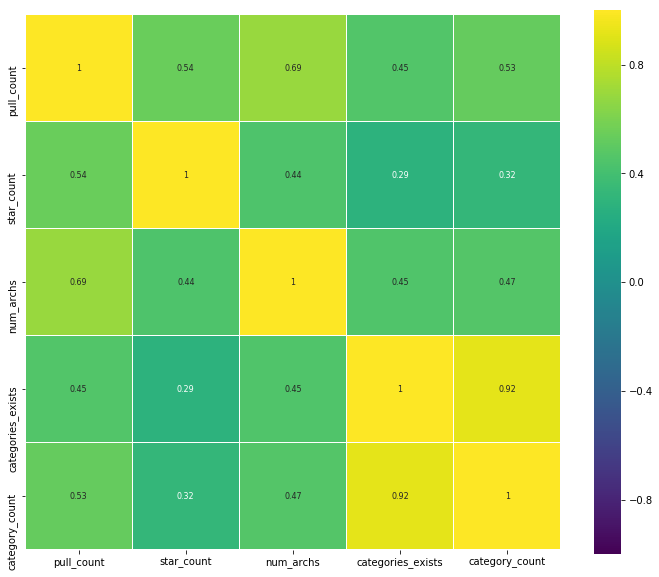

In [117]:
import seaborn as sns
plt.figure(figsize=(12, 10))

sns.heatmap(data.corr(),cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

In [120]:
data = data.drop(['categories_exists', 'categories'], axis=1)

In [121]:
data.head()

,architectures,created_at,operating_systems,pull_count,short_description,slug,source,star_count,updated_at,num_archs,category_count
0,amd64,2018-06-07T11:37:55.871199Z,Linux,1000000.0,Authorization service and frontend for Docker ...,opensuse/portus,community,41,2019-04-30T23:59:19.344857Z,1,0
1,amd64,2018-09-06T12:26:55.953085Z,Linux,3000.0,Customized ArchLinux image.,iterait/archlinux,community,0,2019-04-30T23:58:49.948974Z,1,0
2,amd64,2017-04-06T06:45:03.114546Z,Linux,5000000.0,Always up-to-date Headless Chrome right off th...,alpeware/chrome-headless-trunk,community,25,2019-04-30T23:58:24.64895Z,1,0
3,,2019-04-30T23:58:20.033864Z,None,0.0,,windriver/sparts-test,community,0,2019-04-30T23:58:20.033864Z,0,0
4,amd64,2017-08-14T15:21:19.490759Z,Linux,50000.0,Linux preconfigured build environment to compi...,moneymanagerex/mmex_build_env,community,1,2019-04-30T23:58:18.09384Z,1,0


In [123]:
data.set_index('slug').iloc[342:]

,architectures,created_at,operating_systems,pull_count,short_description,source,star_count,updated_at,num_archs,category_count
slug,,,,,,,,,,
consul,"386, amd64, arm, arm64",2016-06-01T00:00:06.374247Z,Linux,10000000.0,Consul is a datacenter runtime that provides s...,store,884,2019-04-30T23:05:15.151236Z,4,2
centos,"386, amd64, arm, arm64, ppc64le",2016-06-02T20:18:52.167067Z,Linux,10000000.0,The official build of CentOS.,store,5326,2019-04-30T23:05:14.86733Z,5,2
golang,"386, amd64, arm, arm64, ppc64le, s390x",2016-06-17T16:57:06.804926Z,"Linux, Windows",10000000.0,"Go (golang) is a general purpose, higher-level...",store,2621,2019-04-30T23:05:12.230113Z,6,1
mariadb,"386, amd64, arm64, ppc64le",2016-06-17T22:50:30.51871Z,Linux,10000000.0,MariaDB is a community-developed fork of MySQL...,store,2739,2019-04-30T23:05:11.725095Z,4,1
docker,"amd64, arm, arm64, ppc64le, s390x",2016-06-17T23:09:16.794162Z,"Linux, Windows",10000000.0,Docker in Docker!,store,1044,2019-04-30T23:05:09.9928Z,5,2
registry,"amd64, arm, arm64",2016-06-14T21:50:12.52638Z,Linux,10000000.0,The Docker Registry 2.0 implementation for sto...,store,2537,2019-04-30T23:05:09.743723Z,3,3
traefik,"amd64, arm, arm64",2016-06-09T22:15:04.710148Z,"Windows, Linux",10000000.0,"Traefik, The Cloud Native Edge Router",store,884,2019-04-30T23:05:08.589279Z,3,1
memcached,"386, amd64, arm, arm64, ppc64le, s390x",2016-06-17T22:54:28.567116Z,Linux,10000000.0,"Free & open source, high-performance, distribu...",store,1309,2019-04-30T23:05:07.939809Z,6,1
mysql,amd64,2016-05-31T21:47:03.703487Z,Linux,10000000.0,"MySQL is a widely used, open-source relational...",store,8083,2019-04-30T23:05:07.569875Z,1,1
